# Two enzyme kinetics: kinase-phosphatase

## Equations

We obtain the equations as follows.

1. Calculate the six velocities of reaction:
    $$
    \begin{array}{l}
    {k_1*s*e1}\\
    {k_2*e1s}\\
    {k_3 * e1s}\\
    {k_4 * p * e2}\\
    {k_5 * e2p}\\
    {k_6 * e2p}
    \end{array}
    $$
    

2. Assign derivatives with his sign: minus if arrow pointing from the molecule, plus if arrow pointing to molecule
 
    $$
    \begin{array}{l}
    {k_1*s*e1 \rightarrow \left \{ -ds/dt, -de1/dt, de1s/dt \right \}}\\
    {k_2*e1s \rightarrow \left \{ ds/dt, de1/dt, -de1s/dt \right \}}\\
    {k_3 * e1s  \rightarrow \left \{ -de1s/dt, de1/dt, dp/dt \right \}}\\
    {k_4 * p * e2  \rightarrow \left \{ -dp/dt, -de2/dt, de2p/dt \right \}}\\
    {k_5 * e2p \rightarrow \left \{ dp/dt, de2/dt, -de2p/dt \right \}}\\
    {k_6 * e2p  \rightarrow \left \{ dp/dt, de2/dt, -de2p/dt \right \}}\\
    \end{array}
    $$
  
  
  3. Reverse the assignments, from derivatives to reaction rates, adding in each diferencial equation, the rates with their sign. With this approach we construct the equations writing directly on method *modelkp_6*.

## Numerical simulation *modelkp_6*

In [191]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Initial conditions
k_1 = 500
k_2 = 0.15
k_3 = 0.03
k_4 = 1000
k_5 = 0.1
k_6 = 0.01
e1_0 = 0.002
e2_0 = 0.002
s_0 = 0.002
p_0 = 0.001
e2p_0 = 0
e1s_0 = 0
total_time = 100
dt = 0.1

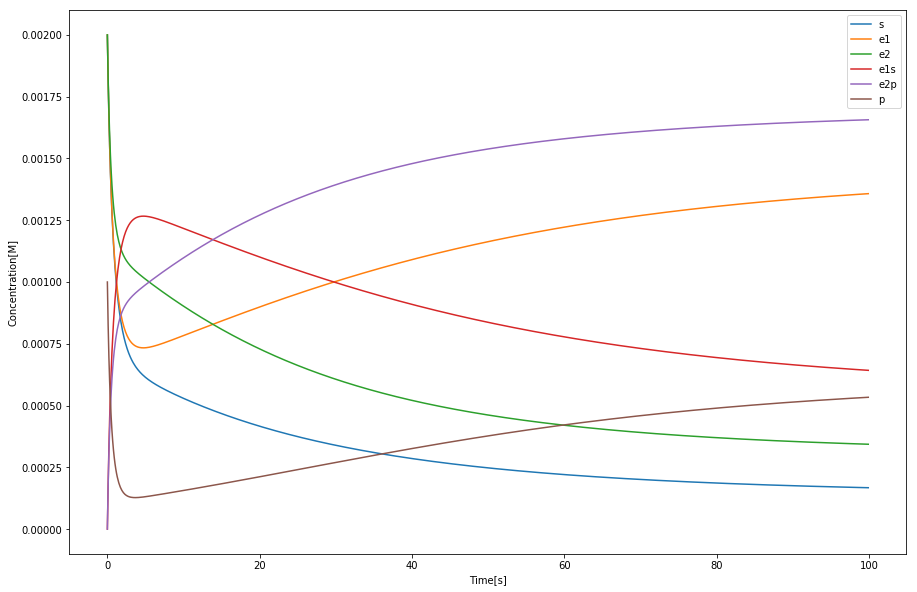

In [192]:
def modelkp_6(y, t, k_1, k_2, k_3, k_4, k_5, k_6):
    [s, e1, e2, e1s, e2p, p] = y
    dsdt = -k_1*s*e1 + k_2 * e1s  + k_6 * e2p
    de1dt = -k_1*s*e1 + k_2 * e1s + k_3 * e1s
    de2dt = -k_4 * p * e2 + k_5 * e2p + k_6 * e2p
    de1sdt = -k_3 * e1s + k_1*s*e1 - k_2 * e1s
    de2pdt = -k_5 * e2p + k_4*p*e2 - k_6 * e2p
    dpdt = k_3 * e1s - k_4*p*e2 + k_5 * e2p
    
    dydt = [dsdt, de1dt, de2dt, de1sdt, de2pdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e1_0, e2_0, e1s_0, e2p_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(modelkp_6, y0, t, args=(k_1, k_2, k_3, k_4, k_5, k_6))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e1")
plt.plot(t, y[:,2], label = "e2")
plt.plot(t, y[:,3], label = "e1s")
plt.plot(t, y[:,4], label = "e2p")
plt.plot(t, y[:,5], label = "p")

plt.xlabel("Time[s]")
plt.ylabel("Concentration[M]")
plt.legend(loc = "best")
plt.show()

## Conservation of mass

Concentrations of enzymes $e1$ and $e2$ remain constant:

$$
\begin{array}{l}
{e1 = e1_0 - e1s}\\
{e2 = e2_0 - e2p}
\end{array}
$$

We write directly on the model method *modelkp_4* both constraints, equating to zero the derivatives.

## Numerical simulation *modelkp_4*

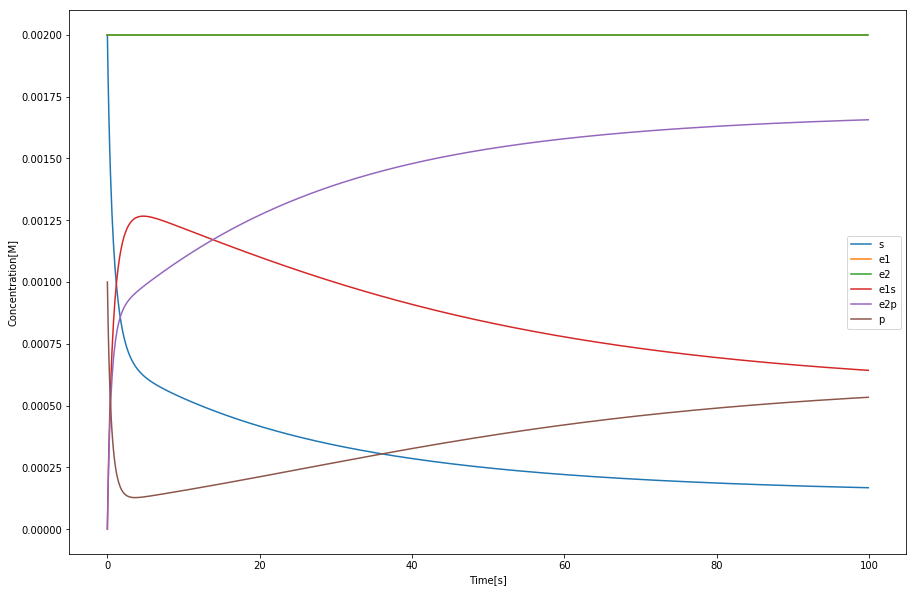

In [193]:
def modelkp_4(y, t, k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0):
    [s, _, _, e1s, e2p, p] = y
    # Constraints
    e1 = e1_0 - e1s
    e2 = e2_0 - e2p
    dsdt = -k_1*s*e1 + k_2 * e1s  + k_6 * e2p
    de1dt = 0
    de2dt = 0
    de1sdt = -k_3 * e1s + k_1*s*e1 - k_2 * e1s
    de2pdt = -k_5 * e2p + k_4*p*e2 - k_6 * e2p
    dpdt = k_3 * e1s - k_4*p*e2 + k_5 * e2p
    
    dydt = [dsdt, de1dt, de2dt, de1sdt, de2pdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e1_0, e2_0, e1s_0, e2p_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(modelkp_4, y0, t, args=(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e1")
plt.plot(t, y[:,2], label = "e2")
plt.plot(t, y[:,3], label = "e1s")
plt.plot(t, y[:,4], label = "e2p")
plt.plot(t, y[:,5], label = "p")

plt.xlabel("Time[s]")
plt.ylabel("Concentration[M]")
plt.legend(loc = "best")
plt.show()

## Second constraint: Michaelis-Menten

$$
\begin{array}{l}
{de1s/dt = 0}\\
{de2p/dt = 0}\\
\end{array}
$$

By imposing:

$$s*k_1 \approx k_2 \gg k_3 $$
$$p*k_4 \approx k_5 \gg k_6 $$

We introduce directly the new constraint over *modelkp_2* method.

## Numerical simulation modelkp_2

We saw that the plots are not similar.

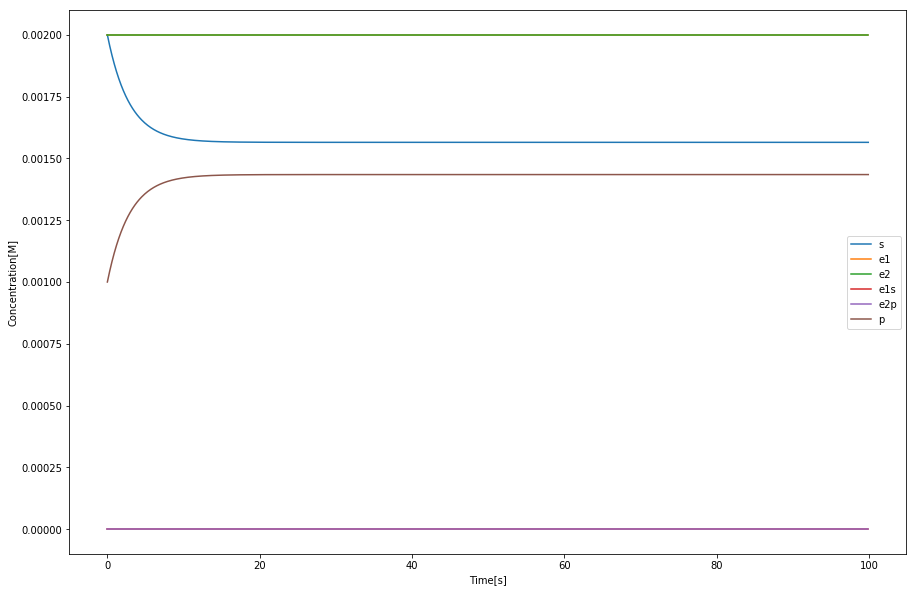

In [194]:
def modelkp_2(y, t, k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0):
    [s, _, _, _, _, p] = y
    # Constraints
    e1 = e1_0 - e1s_0
    e2 = e2_0 - e2p_0
    # Constraints MM
    e1s = (k_1 * s * e1_0) / (k_3 + k_2)
    e2p = (k_4 * p * e2_0) / (k_6 + k_5)
    dsdt = -k_1*s*e1 + k_2 * e1s  + k_6 * e2p
    de1dt = 0
    de2dt = 0
    de1sdt = 0
    de2pdt = 0
    dpdt = k_3 * e1s - k_4*p*e2 + k_5 * e2p
    
    dydt = [dsdt, de1dt, de2dt, de1sdt, de2pdt, dpdt]
    return dydt

# initial condition
y0 = [s_0, e1_0, e2_0, e1s_0, e2p_0, p_0]

# time points
t = np.arange(0, total_time, dt)

# solve ODE
y = odeint(modelkp_2, y0, t, args=(k_1, k_2, k_3, k_4, k_5, k_6,e1_0, e2_0))

plt.figure(figsize=(15,10))

# plot results
plt.plot(t, y[:,0], label = "s")
plt.plot(t, y[:,1], label = "e1")
plt.plot(t, y[:,2], label = "e2")
plt.plot(t, y[:,3], label = "e1s")
plt.plot(t, y[:,4], label = "e2p")
plt.plot(t, y[:,5], label = "p")

plt.xlabel("Time[s]")
plt.ylabel("Concentration[M]")
plt.legend(loc = "best")
plt.show()

## Find parameters compatible with Michaelis Merten

We use this MM conditions to establish relations between parameters:

$$s*k_1 \approx k_2 \gg k_3 $$
$$p*k_4 \approx k_5 \gg k_6 $$

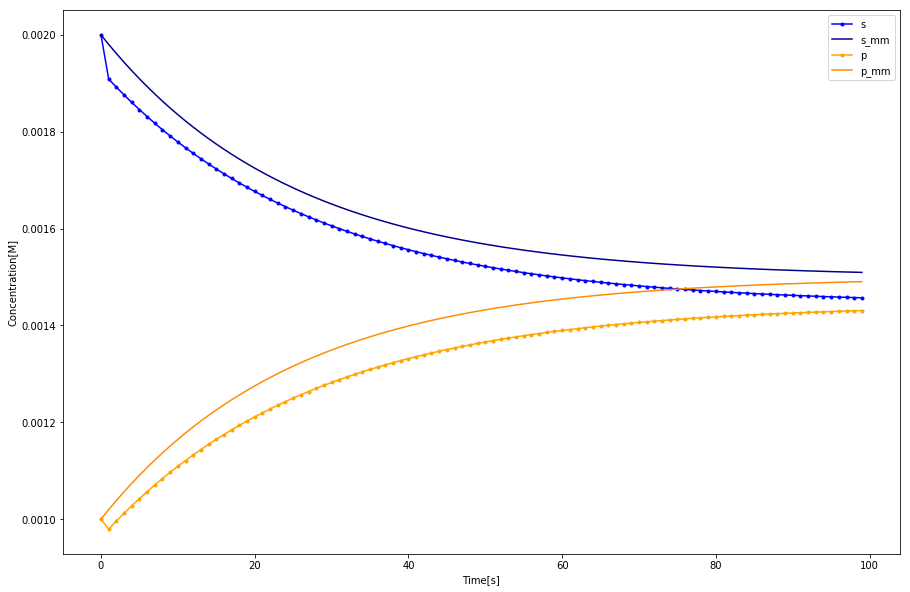

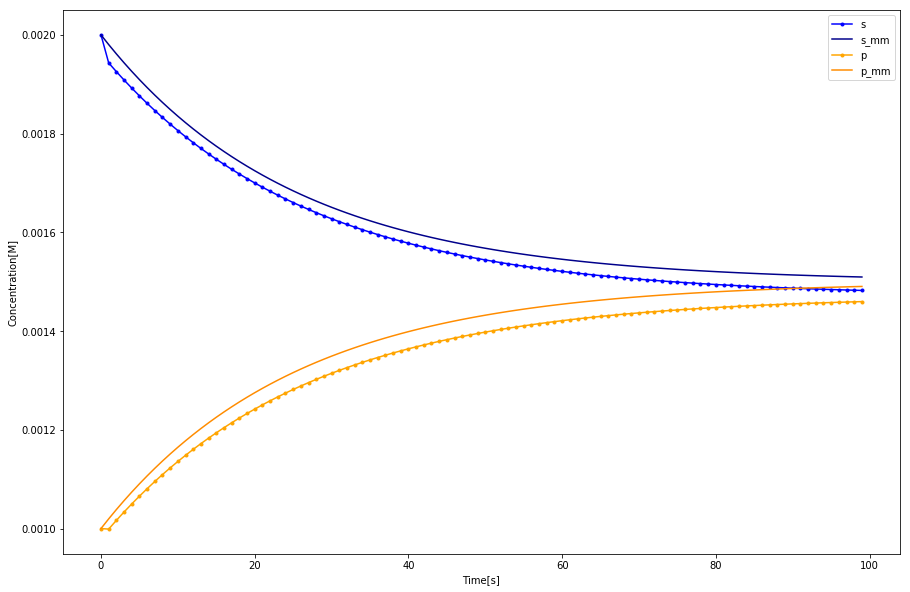

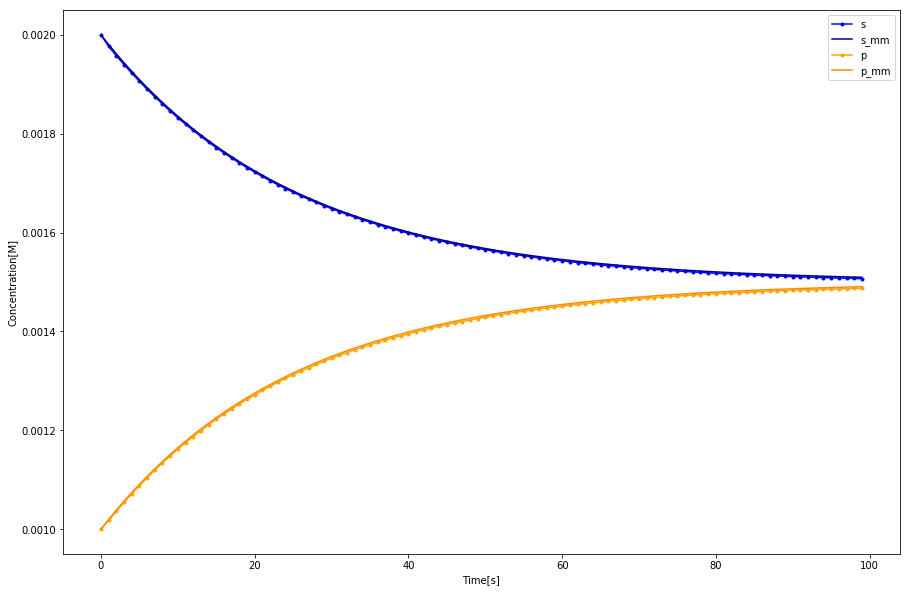

In [213]:
def solve_plot_models(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0):
    # Solve model2 and model3
    y_2 = odeint(modelkp_2, y0, t, args=(k_1, k_2, k_3, k_4, k_5, k_6,e1_0, e2_0))
    y_4 = odeint(modelkp_4, y0, t, args=(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0))

    # Plot models
    plt.figure(figsize=(15,10))
    plt.plot(t, y_4[:,0], label = "s", color="blue", marker = ".")
    plt.plot(t, y_2[:,0], label = "s_mm", color="darkblue")
    plt.plot(t, y_4[:,5], label = "p", color="orange", marker = ".")
    plt.plot(t, y_2[:,5], label = "p_mm", color="darkorange")
    plt.xlabel("Time[s]")
    plt.ylabel("Concentration[M]")
    plt.legend(loc = "best")
    plt.show()

dt = 1
t = np.arange(0, total_time, dt)
# Initial conditions
s_0 = 0.05
p_0 = 0.05
k_1 = 10000
k_2 = k_1 * s_0
k_3 = k_2/1000.0
k_4 = 10000
k_5 = k_4 * p_0
k_6 = k_5/1000.0
e1_0 = 0.002
e2_0 = 0.002
e2p_0 = 0
e1s_0 = 0

solve_plot_models(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0)

# Initial conditions
s_0 = 0.1
p_0 = 0.1
k_1 = 10000
k_2 = k_1 * s_0
k_3 = k_2/1000.0
k_4 = 10000
k_5 = k_4 * p_0
k_6 = k_5/1000.0
e1_0 = 0.002
e2_0 = 0.002
e2p_0 = 0
e1s_0 = 0

solve_plot_models(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0)

# Initial conditions
s_0 = 1
p_0 = 1
k_1 = 10000
k_2 = k_1 * s_0
k_3 = k_2/1000.0
k_4 = 10000
k_5 = k_4 * p_0
k_6 = k_5/1000.0
e1_0 = 0.002
e2_0 = 0.002
e2p_0 = 0
e1s_0 = 0

solve_plot_models(k_1, k_2, k_3, k_4, k_5, k_6, e1_0, e2_0)

# Outputs

In [214]:
%%bash
#jupyter nbconvert --to html_with_toclenvs FernandoFreire_exercise4.ipynb 1> /dev/null 2> /dev/null
jupyter nbconvert --to html_toc FernandoFreire_exercise4.ipynb 1> /dev/null 2> /dev/null